<a href="https://colab.research.google.com/github/xavoliva6/dpfl_pytorch/blob/main/experiments/exp_FedMed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiments on FedMED

**Colab Support**<br/>
Only run the following lines if you want to run the code on Google Colab

In [1]:
# Enable access to files stored in Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
% cd /content/gdrive/My Drive/OPT4ML/src

/content/gdrive/My Drive/OPT4ML/src


## Main

In [3]:
# Install necessary requirements
!pip install -r ../requirements.txt

     |████████████████████████████████| 15.3MB 1.3MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 9.9MB 40.7MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.2

In [4]:
# Make sure cuda support is available
import torch

if torch.cuda.is_available():
    device_name = "cuda:0"
else:
    device_name = "cpu"
print("device_name: {}".format(device_name))
device = torch.device(device_name)

device_name: cpu


In [ ]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import warnings

warnings.filterwarnings("ignore")

from server import Server
from utils import plot_exp

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100

### First experiment : impact of federated learning

In [11]:
LR = 0.01
EPOCHS = 100
PATIENCE = 8
NR_TRAINING_ROUNDS = 100
BATCH_SIZE = 8
RANGE_NR_CLIENTS = [1, 5, 10]

In [13]:
experiment_losses, experiment_accs = [], []
for nr_clients in RANGE_NR_CLIENTS:
    print(f"### Number of clients : {nr_clients} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='MED',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=False,
        max_grad_norm=None,
        noise_multiplier=None,
        epsilon=None,
        is_parallel=False,
        device=device,
        verbose='server')
    test_losses, test_accs = server.train()
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### Number of clients : 1 ###


--- Configuration ---
nr_clients: 1
nr_training_rounds: 30
data: MED
epochs: 100
lr: 0.01
batch_size: 8
is_private: False
epsilon: None
max_grad_norm: None
noise_multiplier: None
is_parallel: False
device: <class 'torch.device'>
verbose: server
--- Training ---
Round 1, test_loss: 1.254, test_acc: 0.792
Round 2, test_loss: 4.842, test_acc: 0.333
Round 3, test_loss: 1.629, test_acc: 0.625
Round 4, test_loss: 0.299, test_acc: 1.000
Round 5, test_loss: 0.234, test_acc: 1.000
Round 6, test_loss: 0.223, test_acc: 1.000
Round 7, test_loss: 0.202, test_acc: 1.000
Round 8, test_loss: 0.169, test_acc: 1.000
Round 9, test_loss: 0.164, test_acc: 1.000
Round 10, test_loss: 0.148, test_acc: 1.000
Round 11, test_loss: 0.128, test_acc: 1.000
Round 12, test_loss: 0.125, test_acc: 1.000
Round 13, test_loss: 0.128, test_acc: 1.000
Round 14, test_loss: 0.131, test_acc: 1.000
Round 15, test_loss: 0.099, test_acc: 1.000
Round 16, test_loss: 0.095, test_acc: 1.000
Round 17, t

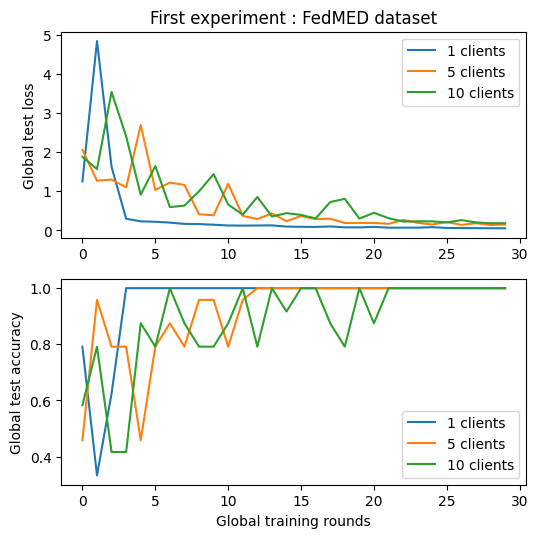

In [14]:
names = [f'{i} clients' for i in RANGE_NR_CLIENTS]
title = 'First experiment : FedMED dataset'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
fig.savefig("FedMED_exp1.pdf")

### Second experiment : impact of differential privacy

In [15]:
NR_CLIENTS = 5
NR_TRAINING_ROUNDS = 30
EPOCHS = 100
PATIENCE = 20
LR = 1e-4
BATCH_SIZE = 8

MAX_GRAD_NORM = 1.2
NOISE_MULTIPLIER = 0.1

RANGE_EPSILON = [100]

In [16]:
experiment_losses, experiment_accs = [], []
for epsilon in RANGE_EPSILON:
    print(f"### ε : {epsilon} ###\n\n")
    server = Server(
        nr_clients=NR_CLIENTS,
        nr_training_rounds=NR_TRAINING_ROUNDS,
        data='MED',
        epochs=EPOCHS,
        lr=LR,
        batch_size=BATCH_SIZE,
        is_private=True,
        epsilon=epsilon,
        max_grad_norm=MAX_GRAD_NORM,
        noise_multiplier=NOISE_MULTIPLIER,
        is_parallel=True,
        device=device,
        verbose='server')

    test_losses, test_accs = server.train()
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### ε : 100 ###


--- Configuration ---
nr_clients: 5
nr_training_rounds: 30
data: MED
epochs: 100
lr: 0.0001
batch_size: 8
is_private: True
epsilon: 100
max_grad_norm: 1.2
noise_multiplier: 0.1
is_parallel: True
device: <class 'torch.device'>
verbose: server
--- Training ---
Round 1, test_loss: 14.432, test_acc: 0.667
Round 2, test_loss: 13.701, test_acc: 0.667
Round 3, test_loss: 12.967, test_acc: 0.667
Round 4, test_loss: 12.231, test_acc: 0.667
Round 5, test_loss: 11.499, test_acc: 0.667
Round 6, test_loss: 10.764, test_acc: 0.667
Round 7, test_loss: 10.030, test_acc: 0.667
Round 8, test_loss: 9.296, test_acc: 0.667
Round 9, test_loss: 8.568, test_acc: 0.667
Round 10, test_loss: 7.841, test_acc: 0.667
Round 11, test_loss: 7.130, test_acc: 0.667
Round 12, test_loss: 6.437, test_acc: 0.667
Round 13, test_loss: 5.769, test_acc: 0.667
Round 14, test_loss: 5.160, test_acc: 0.667
Round 15, test_loss: 4.657, test_acc: 0.667
Round 16, test_loss: 4.266, test_acc: 0.667
Round 17, test_loss: 

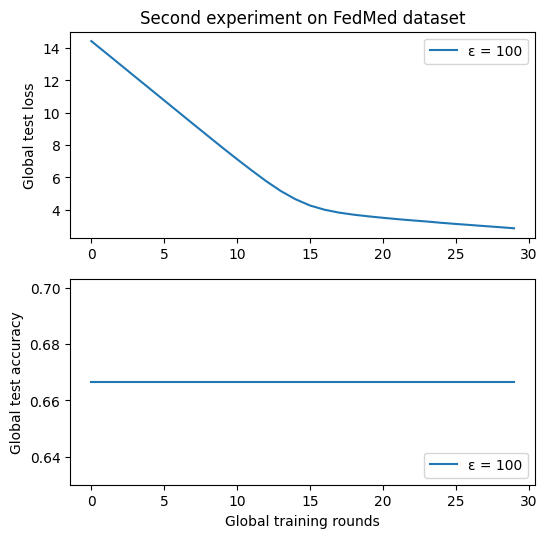

In [17]:
names = [f'ε = {i}' for i in RANGE_EPSILON]
title = 'Second experiment on FedMed dataset'
fig = plot_exp(experiment_losses, experiment_accs, names, title)
fig.savefig("FedMED_exp2.pdf")